# Breast Cancer Dataset

Loading the dataset

In [1]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast_data = breast.data

Checking the shape of the data

In [2]:
breast_data.shape

(569, 30)

Loading the labels

In [3]:
breast_labels = breast.target
breast_labels.shape

(569,)

Reshaping the labels to concatenate with the data

In [4]:
import numpy as np

labels = np.reshape(breast_labels,(569,1))
labels.shape

(569, 1)

Concatenating the data with the label

The shape should be (569, 31) *(30+1 because the label added)*

In [5]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

Creating a panda DataFrame from the array

In [6]:
import pandas as pd

breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names

features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Appending the labels to the features

In [7]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Replacing the original labels

0 -> Benign, 1 -> Malignant

In [8]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


## Visualizing the data

In [9]:
x_train = breast_dataset.loc[:, features].values

print(x_train.shape)
np.min(x_train), np.max(x_train)

(569, 30)


(0.0, 4254.0)

Normalizing the features

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_normalized = scaler.transform(x_train)

print(x_train_normalized.shape)
np.min(x_train_normalized), np.max(x_train_normalized)

(569, 30)


(-3.112084787919981, 12.072680399588068)

Checking whether the normalized data has a mean of zero and a standard deviation of one

In [11]:
print(np.mean(x_train),np.std(x_train))
print(np.mean(x_train_normalized),np.std(x_train_normalized))

61.89071233951961 228.29740508276657
-6.826538293184326e-17 1.0


Converting the normalized features into a DataFrame

In [12]:
feat_cols = ['feature{}'.format(str(i)) for i in range(x_train_normalized.shape[1])]

df_breast_normalized = pd.DataFrame(x_train_normalized,columns=feat_cols)

df_breast_normalized['label'] = labels

df_breast_normalized.shape

(569, 31)

In [13]:
df_breast_normalized.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,label
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


PCA - keeping 3 components, then applying `fit_transform` on the training data

In [14]:
from sklearn.decomposition import PCA

pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(df_breast_normalized.iloc[:,:-1])

Converting from a numpy array to a pandas DataFrame

In [15]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_breast_Df['y'] = labels

principal_breast_Df.head()

,principal component 1,principal component 2,principal component 3,y
0,9.192837,1.948583,-1.123163,0
1,2.387802,-3.768172,-0.529289,0
2,5.733896,-1.075174,-0.551745,0
3,7.122953,10.275589,-3.232788,0
4,3.935302,-1.948072,1.389773,0


Printing the **variance**

In [16]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163]


Visualizing the Breast Cancer data in two-dimensions using seaborn's scatterplot (PC1 vs PC2)

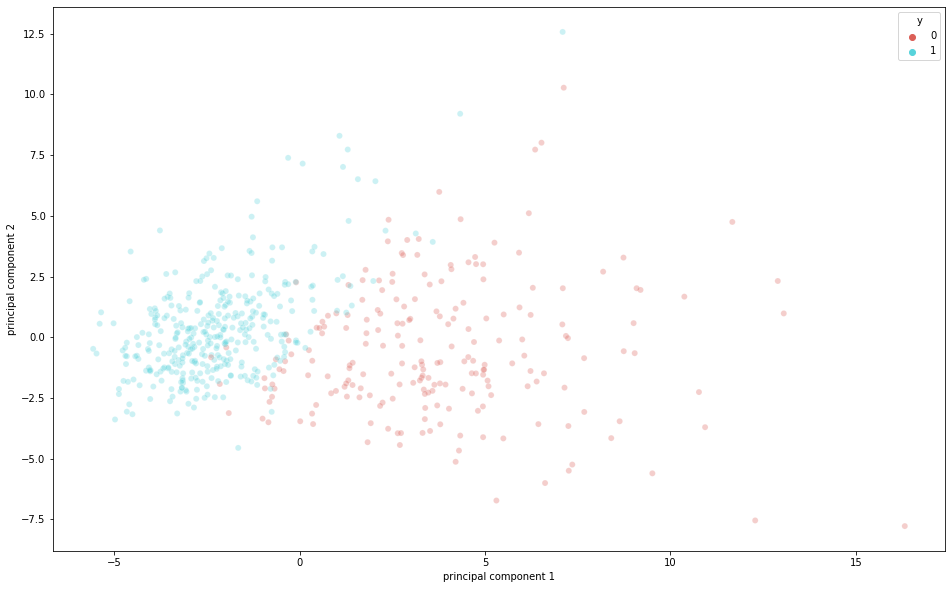

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 1', y='principal component 2',
    hue="y",
    palette=sns.color_palette('hls', 2),
    data=principal_breast_Df,
    legend='full',
    alpha=0.3
)

Seaborn's scatterplot for PC2 vs PC3

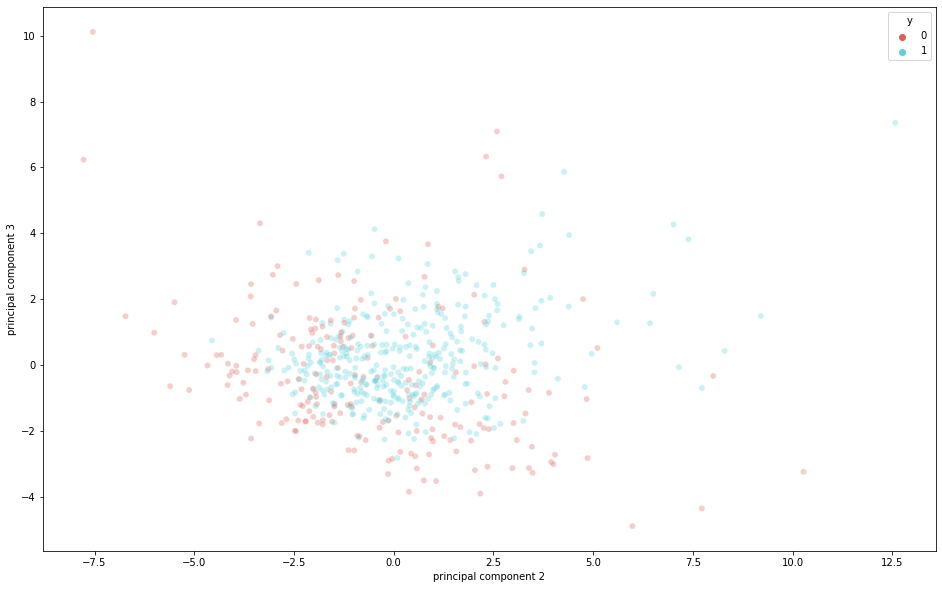

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 2', y='principal component 3',
    hue="y",
    palette=sns.color_palette('hls', 2),
    data=principal_breast_Df,
    legend='full',
    alpha=0.3
)

PC1 vs PC2 using pyplot

<Figure size 432x288 with 0 Axes>

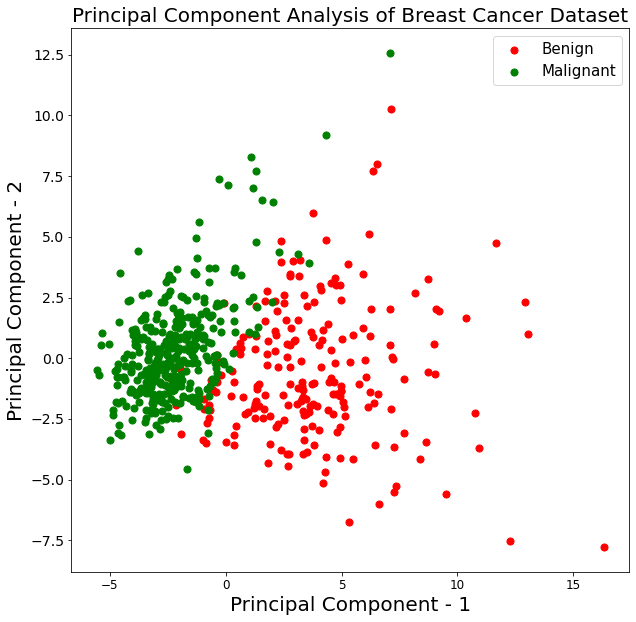

In [19]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

PC2 vs PC3 using pyplot

<Figure size 432x288 with 0 Axes>

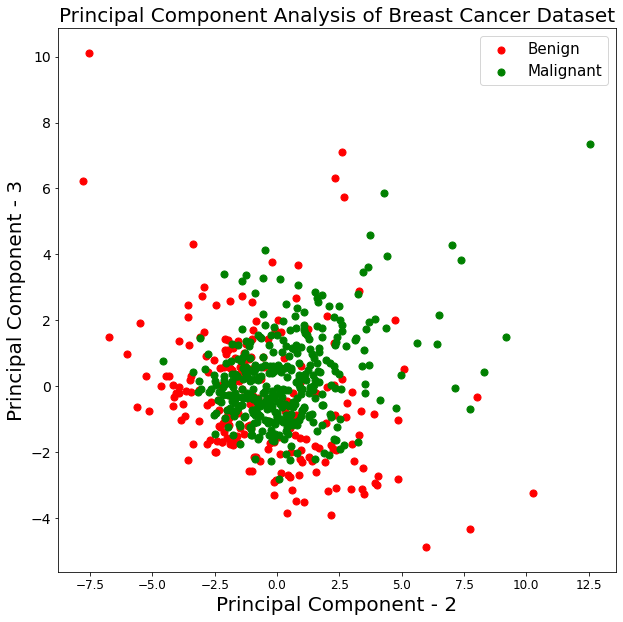

In [20]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 2',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 2']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

## Deep learning

In [21]:
x = breast_dataset.loc[:, features].values
x.shape

(569, 30)

In [22]:
y = labels
y.shape

(569, 1)

In [23]:
import math

train_data_len = math.floor(len(x)*0.8)
train_data_len

455

In [24]:
x_train = x[:train_data_len]
x_test = x[train_data_len:]
print(x_train.shape)
print(x_test.shape)

(455, 30)
(114, 30)


In [25]:
y_train = y[:train_data_len]
y_test = y[train_data_len:]

In [26]:
np.min(x_train), np.max(x_train)

(0.0, 3432.0)

In [27]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_normalized = scaler.transform(x_train)

In [28]:
pca = PCA(0.9)

pca.fit(x_train_normalized)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca.n_components_

7

In [30]:
x_test_normalized = scaler.transform(x_test)

In [31]:
train_img_pca = pca.transform(x_train_normalized)
test_img_pca = pca.transform(x_test_normalized)

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [33]:
batch_size = 128
num_classes = 2
num_components = pca.n_components_
epochs = 20

In [34]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(num_components,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total params: 1,714,434
Trainable params: 1,714,434
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
4/4 [==============================] - 1s 218ms/step - loss: 0.7198 - accuracy: 0.7038 - val_loss: 0.0795 - val_accuracy: 0.9737
Epoch 2/20
4/4 [==============================] - 0s 48ms/step - loss: 0.0686 - accuracy: 0.9781 - val_loss: 0.0853 - val_accuracy: 0.9737
Epoch 3/20
4/4 [==============================] - 0s 51ms/step - loss: 0.0672 - accuracy: 0.9751 - val_loss: 0.0663 - val_accuracy: 0.9825
Epoch 4/20
4/4 [==============================] - 0s 48ms/step - loss: 0.0693 - accuracy: 0.9780 - val_loss: 0.0801 - val_accuracy: 0.9737
Epoch 5/20
4/4 [==============================] - 0s 49ms/step - loss: 0.0366 - accuracy: 0.9902 - val_loss: 0.0559 - val_accuracy: 0.9825
Epoch 6/20
4/4 [==============================] - 0s 50ms/step - loss: 0.0619 - accuracy: 0.9833 - val_loss: 0.1398 - val_accuracy: 0.9561
Epoch 7/20
4/4 [==============================] - 0s 49ms/step - loss: 0.0419 - accuracy: 0.9838 - val_loss: 0.0542 - val_accuracy: 0.9912
Epoch 8/20
4/4 [==========

In [36]:
batch_size = 128
num_classes = 2
num_components = 30
epochs = 20

In [37]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(num_components,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              31744     
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 1,737,986
Trainable params: 1,737,986
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_normalized, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_normalized, y_test))

Epoch 1/20
4/4 [==============================] - 1s 97ms/step - loss: 0.8185 - accuracy: 0.5988 - val_loss: 0.0844 - val_accuracy: 0.9825
Epoch 2/20
4/4 [==============================] - 0s 50ms/step - loss: 0.0745 - accuracy: 0.9733 - val_loss: 0.0854 - val_accuracy: 0.9912
Epoch 3/20
4/4 [==============================] - 0s 49ms/step - loss: 0.0608 - accuracy: 0.9789 - val_loss: 0.1173 - val_accuracy: 0.9737
Epoch 4/20
4/4 [==============================] - 0s 50ms/step - loss: 0.0561 - accuracy: 0.9762 - val_loss: 0.1048 - val_accuracy: 0.9649
Epoch 5/20
4/4 [==============================] - 0s 47ms/step - loss: 0.0404 - accuracy: 0.9831 - val_loss: 0.0670 - val_accuracy: 0.9737
Epoch 6/20
4/4 [==============================] - 0s 49ms/step - loss: 0.0356 - accuracy: 0.9824 - val_loss: 0.0821 - val_accuracy: 0.9825
Epoch 7/20
4/4 [==============================] - 0s 48ms/step - loss: 0.0360 - accuracy: 0.9898 - val_loss: 0.1307 - val_accuracy: 0.9649
Epoch 8/20
4/4 [===========